In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid', palette='muted', font_scale=1.5)



RANDOM_SEED = 42

In [ ]:
import pandas as pd

columns = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
# Skip problematic lines by setting error_bad_lines=False
df = pd.read_csv('/content/WISDM_ar_v1.1_raw.txt', header=None, names=columns, error_bad_lines=False)
df = df.dropna()


<ipython-input-5-8c1a8f0bf1f5>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/WISDM_ar_v1.1_raw.txt', header=None, names=columns, error_bad_lines=False)
Skipping line 134634: expected 6 fields, saw 11
Skipping line 197687: expected 6 fields, saw 11

Skipping line 273261: expected 6 fields, saw 11
Skipping line 371932: expected 6 fields, saw 11



In [ ]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.tail()

,user,activity,timestamp,x-axis,y-axis,z-axis
399021,5,Standing,3152292278000,-1.73,9.81,0.926184
399022,5,Standing,3152342205000,-1.69,9.77,0.885323
399023,5,Standing,3152392284000,-1.61,9.70,0.844462
399024,5,Standing,3152442211000,-1.69,9.66,0.844462
399025,5,Standing,3152492260000,-1.73,9.77,0.885323


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame containing accelerometer data
# X contains accelerometer readings, and y contains corresponding labels (activities)
X = df[['x-axis', 'y-axis', 'z-axis']].values
y = df['activity'].values

# Label encoding for target labels (activities)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (assuming 3 axes for accelerometer readings)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define CNN model
num_classes = len(label_encoder.classes_)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.save('apvss.keras')

Epoch 1/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.9662 - accuracy: 0.6179 - val_loss: 0.9213 - val_accuracy: 0.6311
Epoch 2/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.9154 - accuracy: 0.6353 - val_loss: 0.9096 - val_accuracy: 0.6373
Epoch 3/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.9078 - accuracy: 0.6388 - val_loss: 0.9070 - val_accuracy: 0.6378
Epoch 4/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.9032 - accuracy: 0.6407 - val_loss: 0.8972 - val_accuracy: 0.6416
Epoch 5/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.8999 - accuracy: 0.6426 - val_loss: 0.8977 - val_accuracy: 0.6434
Epoch 6/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.8976 - accuracy: 0.6439 - val_loss: 0.8970 - val_accuracy: 0.6419
Epoch 7/10
9976/9976 [==============================] - 27s 3ms/step - loss: 0.8963 - accuracy: 0.6448 - val_loss: 0.8930 - val_ac

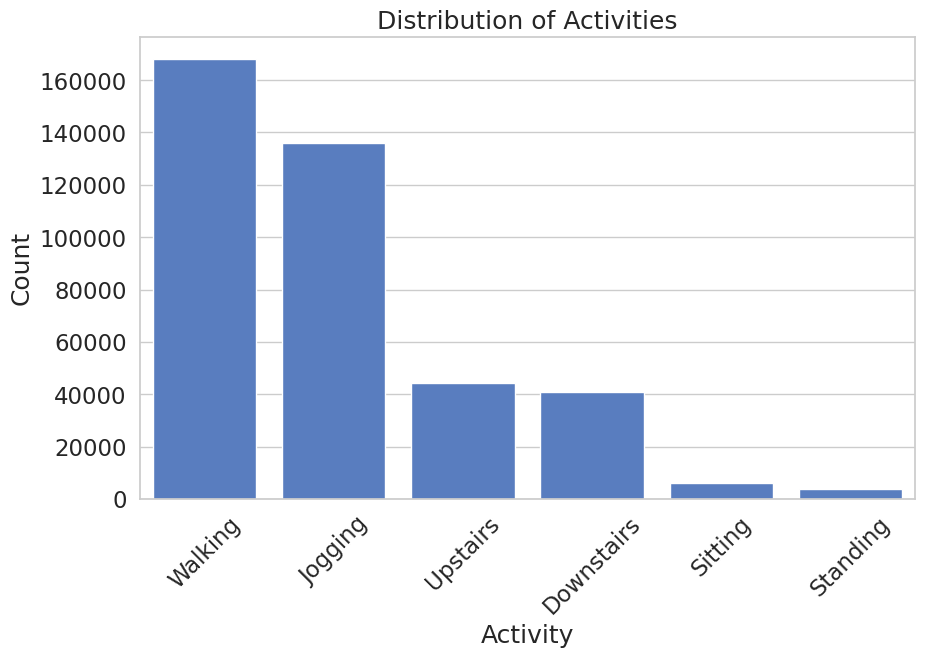

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each activity
activity_counts = df['activity'].value_counts()

# Plot the distribution of activities
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


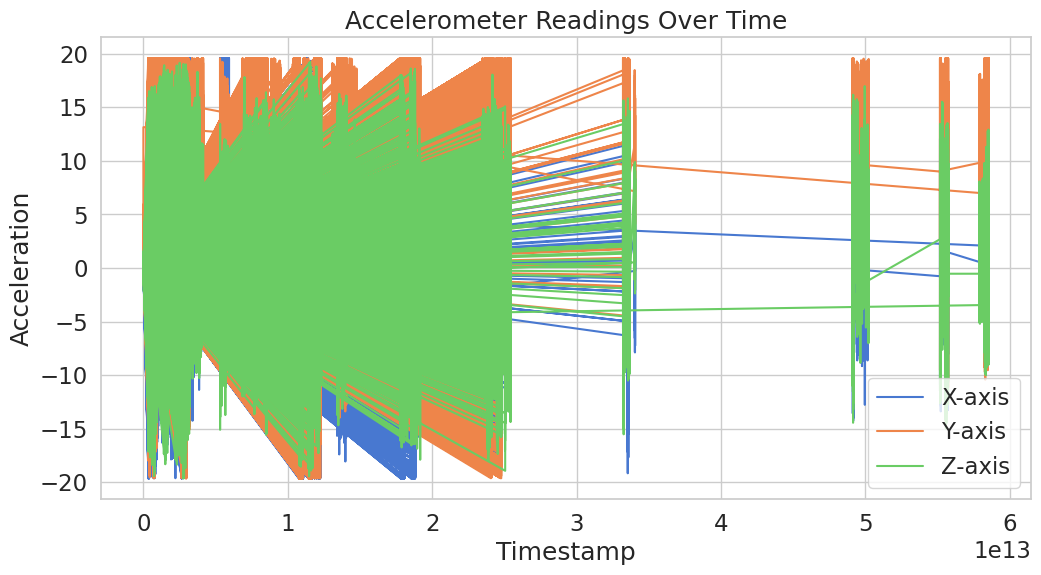

In [ ]:
# Plot accelerometer readings over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['x-axis'], label='X-axis')
plt.plot(df['timestamp'], df['y-axis'], label='Y-axis')
plt.plot(df['timestamp'], df['z-axis'], label='Z-axis')
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()


2494/2494 [==============================] - 8s 3ms/step


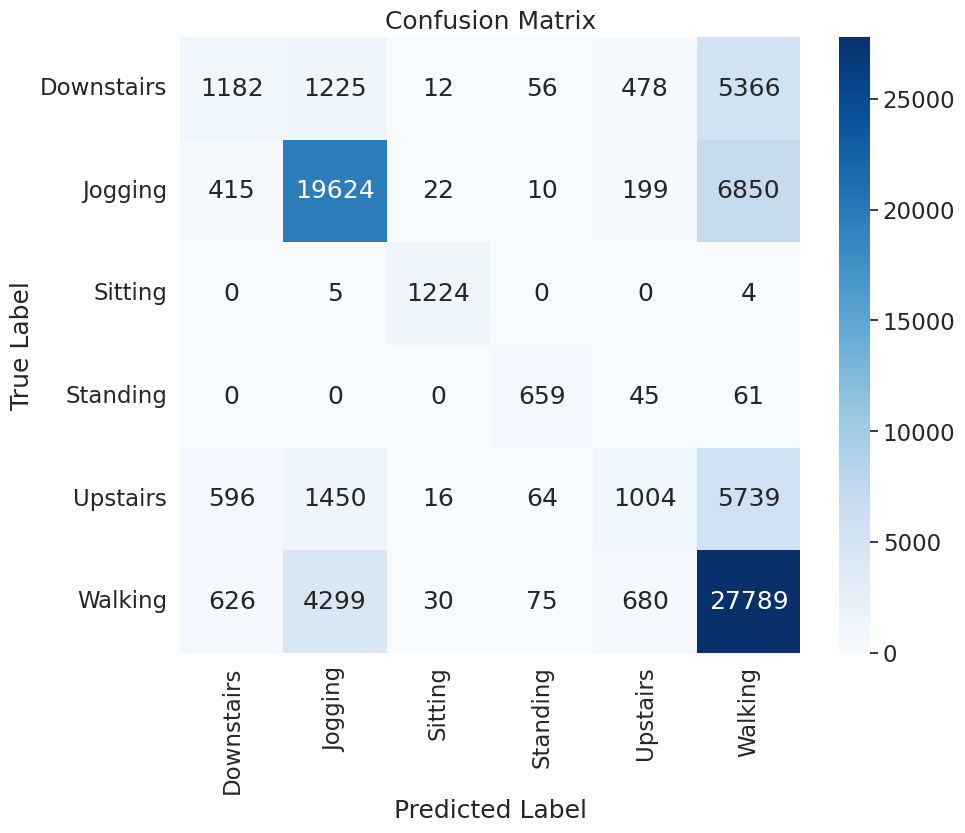

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for the test set
# Predict probabilities for the test set
y_pred_probabilities = model.predict(X_test)

# Get the predicted class (index of the maximum probability)
y_pred = y_pred_probabilities.argmax(axis=1)


# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


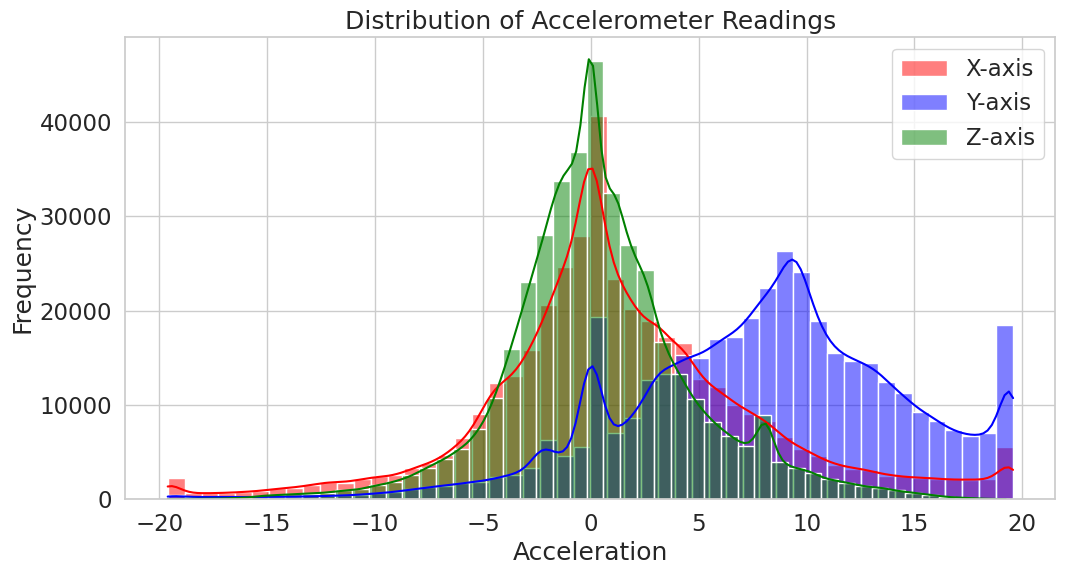

In [ ]:
# Distribution of accelerometer readings for each axis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='x-axis', bins=50, kde=True, color='red', label='X-axis')
sns.histplot(data=df, x='y-axis', bins=50, kde=True, color='blue', label='Y-axis')
sns.histplot(data=df, x='z-axis', bins=50, kde=True, color='green', label='Z-axis')
plt.title('Distribution of Accelerometer Readings')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


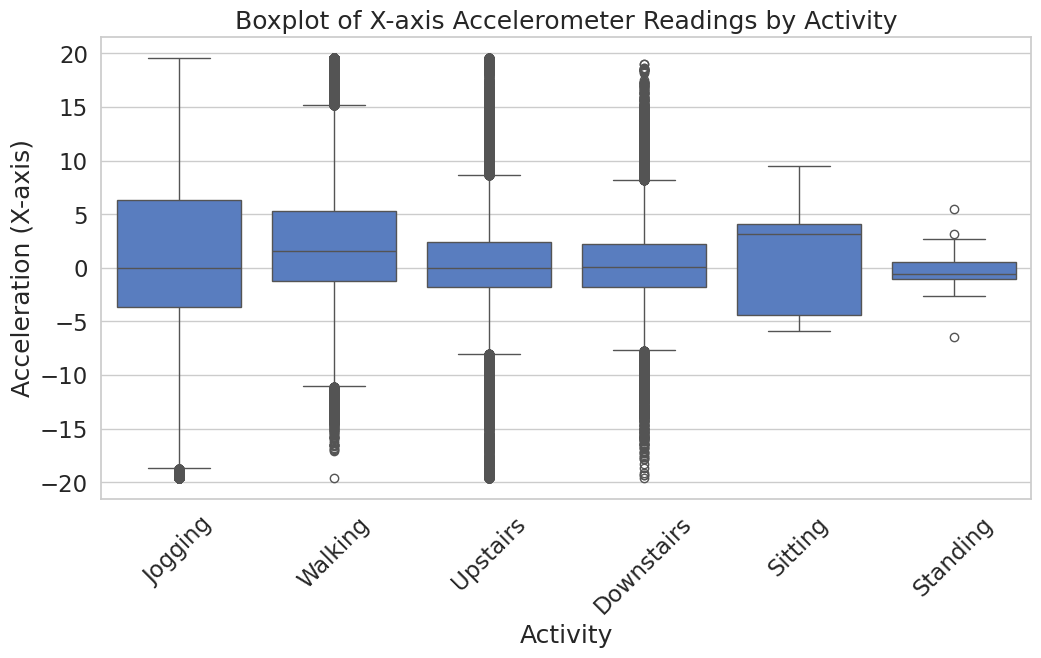

In [ ]:
# Boxplot of accelerometer readings by activity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='activity', y='x-axis')
plt.title('Boxplot of X-axis Accelerometer Readings by Activity')
plt.xlabel('Activity')
plt.ylabel('Acceleration (X-axis)')
plt.xticks(rotation=45)
plt.show()


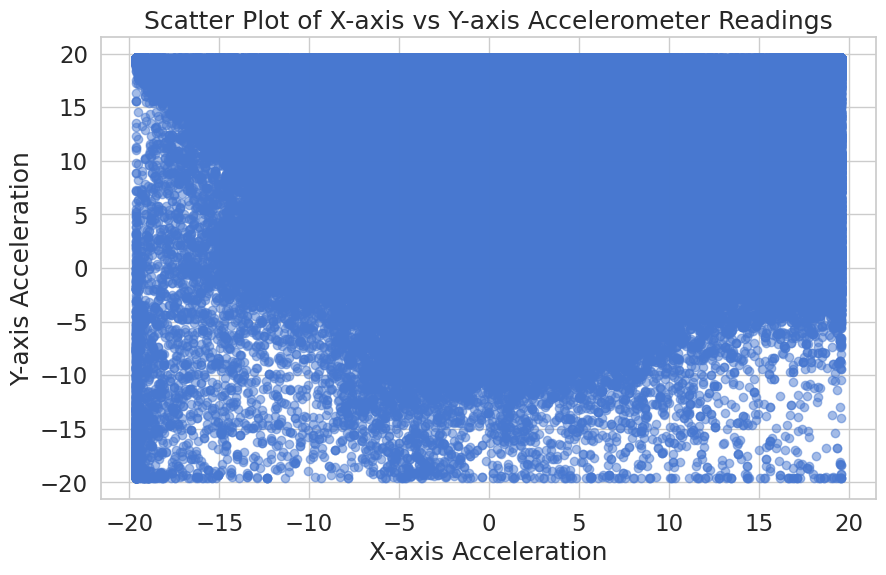

In [ ]:
# Scatter plot of x-axis vs y-axis accelerometer readings
plt.figure(figsize=(10, 6))
plt.scatter(df['x-axis'], df['y-axis'], alpha=0.5)
plt.title('Scatter Plot of X-axis vs Y-axis Accelerometer Readings')
plt.xlabel('X-axis Acceleration')
plt.ylabel('Y-axis Acceleration')
plt.show()


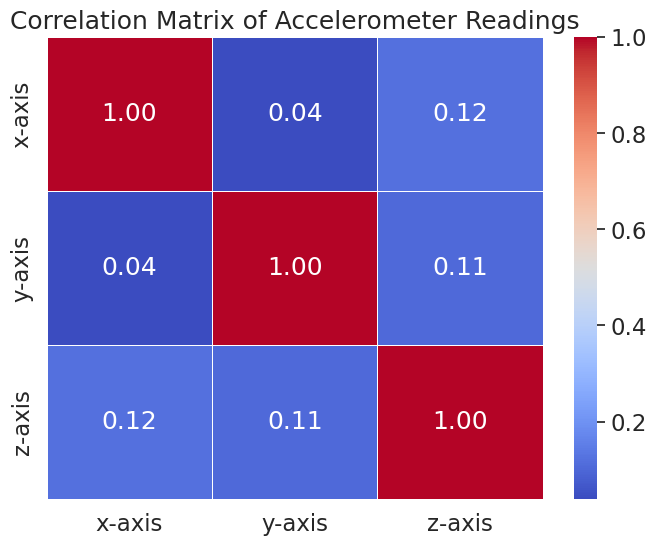

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df[['x-axis', 'y-axis', 'z-axis']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Accelerometer Readings')
plt.show()


In [ ]:
!pip install flask
!pip install pyngrok


In [ ]:
!ngrok authtoken 2eRofT8Y5lplUQl8iAsWt1B1ibB_73vkeDNB56bCCo6EbgjQJ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model


# Load the trained model
model = load_model('/content/apvss.h5')

# Initialize Flask application
app = Flask(__name__)

# Define a route for receiving input data and returning predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.json

    # Preprocess the input data as needed
    # Example: Convert data to numpy array and reshape if necessary
    x_data = np.array(data['acceleration_data'])
    x_data = x_data.reshape(1, len(x_data), 1)  # Assuming input shape (samples, timesteps, features)

    # Make predictions using the loaded model
    predictions = model.predict(x_data)

    # Convert predictions to human-readable format if necessary
    # Example: Get predicted activity label
    activity_labels = ['Walking', 'Jogging', 'Standing', 'Sitting', 'Laying']
    predicted_activity = activity_labels[np.argmax(predictions)]

    # Return the predictions as JSON response
    return jsonify({'predicted_activity': predicted_activity})

# Run the Flask application
if __name__ == '__main__':
    app.run(debug=True, port=8000)  # Change port number to 8000 or any other available port



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
